In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re as re
import datetime as dt
from scipy.stats import chi2_contingency


# Ayiti Analytics Probability and Statistics Project

In [2]:
from google.colab import files
uploaded = files.upload()

Saving commune.xlsx to commune (1).xlsx
Saving enroll.csv to enroll (1).csv
Saving industry.csv to industry (1).csv
Saving ord.csv to ord (1).csv
Saving quest.csv to quest (1).csv
Saving study_domain.csv to study_domain (1).csv
Saving technology.csv to technology (1).csv
Saving transaction.csv to transaction (1).csv


In [3]:
# Read the data using csv and excel
commune=pd.read_excel(r"commune.xlsx")
enroll = pd.read_csv(r"enroll.csv")
quest = pd.read_csv(r"quest.csv")
industry = pd.read_csv(r"industry.csv")
ord = pd.read_csv(r"ord.csv")
study_domain = pd.read_csv(r"study_domain.csv")
transaction = pd.read_csv(r"transaction.csv")
technology = pd.read_csv(r"technology.csv")

Use all the files to have a final datasets to have the following columns
   <ul>
    <li>questid</li>
    <li>gender</li>
    <li>age (age of applicant)</li>
    <li>communeName (use data prep in commune file)</li>
    <li>application_date (created at in quest file)</li>
    <li>enroll_date (created_at in enroll file)</li>
    <li>is_enroll (Yes/No) (use data prep in enroll file)</li>
    <li>Education Level</li>
   <li>Communication channels(hear_AA1)</li>
    <li>Bootcamp Interest (after_AA)</li>
    <li>Payement Date (use ord and transaction files)</li>
    <li>Payed (Yes/No)</li>
    <li>list Technologies as columns based (use get_dummies)</li>
    <li>list  Study domains (use get_dummies)</li>
    <li>Job is formal</li>
    <li>Have computer at home</li>
    <li>Have internet at home</li>
    
   </ul>
   

In [4]:
#concat ord and transaction
df=pd.concat([ord,transaction],axis=0)
df

,Unnamed: 0,created_at,user_id,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,quest_id,modified_at,course_id,transaction_id
0,0,2021-03-14T15:34:35.014Z,41587952,Entwodiksyon Nan Syans Done,1100636.0,20.0,2000.0,False,NaN,NaN,NaN,Complete,906b3c86-ce95-11eb-b6a7-7c67a234f601,NaN,NaN,NaN
1,1,2021-03-14T04:20:23.483Z,41564742,Entwodiksyon Nan Syans Done,1100636.0,20.0,2000.0,False,NaN,NaN,NaN,Complete,906636cf-ce95-11eb-8679-7c67a234f601,NaN,NaN,NaN
2,2,2021-03-12T19:29:22.832Z,41501853,Entwodiksyon Nan Syans Done,1100636.0,20.0,2000.0,False,NaN,NaN,NaN,Complete,906968f5-ce95-11eb-9e1a-7c67a234f601,NaN,NaN,NaN
3,3,2021-03-12T14:23:11.154Z,40284930,Entwodiksyon Nan Syans Done,1100636.0,0.0,0.0,False,impact_hub_coupon,6658457.0,NaN,Complete,9060477c-ce95-11eb-ace3-7c67a234f601,NaN,NaN,NaN
4,4,2021-03-11T16:01:17.901Z,40281483,Entwodiksyon Nan Syans Done,1100636.0,20.0,2000.0,False,NaN,NaN,NaN,Complete,9064ff29-ce95-11eb-a3d3-7c67a234f601,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,55,2021-03-13T00:48:13.726Z,40008926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-13T00:48:13.726Z,1047613.0,4.676273e+09
56,56,2021-03-13T03:54:12.406Z,41328544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-13T03:54:12.406Z,1047613.0,4.676841e+09
57,57,2021-03-14T02:16:08.983Z,41508160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-14T02:16:08.983Z,1047613.0,4.684297e+09
58,58,2021-03-14T07:34:09.638Z,41569249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-14T07:34:09.638Z,1047613.0,4.684608e+09


In [5]:
# Rename columns
df.rename(columns={"created_at":"payment_date"}, inplace=True)

In [6]:
#Rename columns Created_at in Transaction files
transaction.rename(columns={"created_at":"moncash_date"}, inplace=True)

#Rename columns Created_at in Ord files
ord.rename(columns={"created_at":"credit_card_date"}, inplace=True)

#Rename columns Created_at in enroll files
enroll.rename(columns={"created_at":"Enroll_Date"}, inplace=True)

#rename columns created-at in quest file
quest.rename(columns={"created_at":"Application_Date"}, inplace=True)

In [7]:
# Format to date
transaction.moncash_date = pd.to_datetime(transaction.moncash_date).dt.tz_localize(None)
ord.credit_card_date= pd.to_datetime(ord.credit_card_date).dt.tz_localize(None)
#enroll.Enroll_Date=pd.to_datetime(enroll.Enroll_Date)
#quest.Application_Date=pd.to_datetime(quest.Application_Date)

In [8]:
#Extract each values of "Study_domain" and place them into a separate Columns before Merge
study_domain1 = pd.get_dummies(data=study_domain[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
study_domain2 = study_domain1.groupby("quest_id").sum()

In [9]:
#Extract each values of "Technology" and place them into a separate Columns before Merge
technology1 = pd.get_dummies(technology[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
technology2 = technology1.groupby("quest_id").sum()

In [10]:
#Extract each values of "industry" and place them into a separate Columns before Merge
industry1= pd.get_dummies(industry[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
industry2= industry1.groupby("quest_id").sum()

In [11]:
# Merge Tables by "quest_id"
result = pd.merge(quest,enroll,how="left",on="quest_id")

# Merge Tables by "user_id"
result1 =pd.merge(result,ord,how="left",on="user_id")
result2 = pd.merge(result1,transaction,how="left",on="user_id")

# create columns named "is_enroll"
result2["is_enroll"] = 'No'
result2.loc[~result2.Enroll_Date.isna(),["is_enroll"]] ="Yes"

# create columns named "payed"
result2["payed"] = 'No'
result2.loc[~(result1.credit_card_date.isna() & result2.moncash_date.isna()),["payed"]] ="Yes"

In [12]:
# Drop Columns
result2.drop(["Unnamed: 0_x","modified_at_x","Unnamed: 0_y","expiry_date",'course_name','course_id_x','percentage_completed','completed_at','expired','is_free_trial','completed','started_at','activated_at','updated_at','Unnamed: 0_x','product_name', 'product_id','amount_dollars','amount_cents','subscription','quest_id_y','Unnamed: 0_y','modified_at_y','course_id_y','transaction_id'], axis="columns" , inplace=True)

In [13]:
#Drop columns
result2.drop(['coupon_code','coupon_id', 'affiliate_referral_code','status','study_domain'], axis="columns" , inplace=True)

In [14]:
#rename columns quest_id_x in result2 file
result2.rename(columns={"quest_id_x":"quest_id"}, inplace=True)

In [15]:
#merge tables on "quest_id"
result3=pd.merge(result2,study_domain2, how = 'left',on='quest_id')

In [16]:
#Merge tables
result4=pd.merge(result3,technology2, how = 'left',on='quest_id')

In [17]:
# Merge tables
#result5=pd.merge(result4,industry2, how = 'left',on='quest_id')

#Transform "Commune_Id" Values in lower Character before Merge
commune["Commune_Id"] = commune["Commune_Id"].str.lower()

#Rename "Commune_Id" in "commune"
commune.rename(columns = {"Commune_Id": "commune"}, inplace = True)

# Merge Result4 and Commune
result6=pd.merge(result4,commune[["Commune_FR","Departement", "commune"]], how = 'left',on='commune')

In [18]:
#rename columns in result6 file
result6.rename(columns={"hear_AA_1":"communication_channel",'after_AA':"Bootcamp_Interest",'other_x':"Others_Study_Domain",'other_y':"Others_Technologies",'other':"other_industry",'Commune_FR':"commune_name"}, inplace=True)

In [19]:
#Drop columns
result6.drop(['commune',"department"], axis="columns" , inplace=True)
result6.columns

Index(['gender', 'dob', 'Application_Date', 'education_level', 'university',
       'current_employed', 'formal_sector_job', 'have_computer_home',
       'internet_at_home', 'communication_channel', 'Bootcamp_Interest',
       'quest_id', 'Enroll_Date', 'user_id', 'credit_card_date',
       'moncash_date', 'is_enroll', 'payed', 'Accounting', 'Computer Science',
       'Economics', 'Electrical Engineering', 'Law', 'Management', 'Medicine',
       'Statistics', 'Others_Study_Domain', 'Bash', 'Excel', 'Git', 'Java',
       'JavaScript', 'PHP', 'PowerBI or Tableau', 'Python', 'R', 'SQL', 'VBA',
       'Others_Technologies', 'commune_name', 'Departement'],
      dtype='object')

In [20]:
#Format in Date 
result6["dob"].replace({"3 aout 1977": "3/08/1977"}, inplace=True)
result6.dob = pd.to_datetime(result6.dob).dt.tz_localize(None)
result6.Application_Date = pd.to_datetime(result6.Application_Date).dt.tz_localize(None)

# remove timezone to those columns
#testdata['time'].dt.tz_localize(None)

# Add columns age
result6["age"] = (result6["Application_Date"] -result6["dob"])
result6["age"] = result6["age"]// np.timedelta64(1,"Y")

# See the Result
result6.head(4)


,gender,dob,Application_Date,education_level,university,current_employed,formal_sector_job,have_computer_home,internet_at_home,communication_channel,Bootcamp_Interest,quest_id,Enroll_Date,user_id,credit_card_date,moncash_date,is_enroll,payed,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,Others_Study_Domain,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,Others_Technologies,commune_name,Departement,age
0,male,1998-08-25,2021-02-14 23:03:52.768400,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,2021-02-14T23:15:19.500Z,39726355.0,NaT,NaT,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Port-au-Prince,West,22.0
1,female,1996-09-29,2021-02-16 16:01:10.861844,Bachelors (bacc +4),other,No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,NaN,NaT,NaT,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Port-au-Prince,West,24.0
2,male,1996-05-17,2021-02-16 16:56:30.579504,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),No,unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,2021-02-20T21:20:37.450Z,40117659.0,NaT,2021-03-03 23:00:11.974,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Port-au-Prince,West,24.0
3,male,1996-11-24,2021-02-16 16:57:55.754541,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),No,unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,NaN,NaN,NaT,NaT,No,No,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Port-au-Prince,West,24.0


In [21]:
#Merge Table
result7=pd.merge(result6,df[['payment_date','user_id']],how='left', on='user_id')

In [22]:
#Format in date
result7. payment_date = pd.to_datetime(result7. payment_date).dt.tz_localize(None)

In [23]:
#Drop columns
result7.drop(['user_id',"Departement","current_employed","university","dob","credit_card_date","moncash_date"], axis="columns" , inplace=True)
result7.columns

Index(['gender', 'Application_Date', 'education_level', 'formal_sector_job',
       'have_computer_home', 'internet_at_home', 'communication_channel',
       'Bootcamp_Interest', 'quest_id', 'Enroll_Date', 'is_enroll', 'payed',
       'Accounting', 'Computer Science', 'Economics', 'Electrical Engineering',
       'Law', 'Management', 'Medicine', 'Statistics', 'Others_Study_Domain',
       'Bash', 'Excel', 'Git', 'Java', 'JavaScript', 'PHP',
       'PowerBI or Tableau', 'Python', 'R', 'SQL', 'VBA',
       'Others_Technologies', 'commune_name', 'age', 'payment_date'],
      dtype='object')

###  1. How many observations and variables are there in the dataset
 

In [24]:
# here your codes
A=result7.shape
print(f'Observation Number is : {A[0]} and  Variables numbers are : {A[1]}' )

Observation Number is : 250 and  Variables numbers are : 36


### 2.A Calculate the average age of the observations
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset
### 2.B Calculate 
   * variance of the whole dataset,male and female
   * kurtosis of the whole dataset,male and female
   * skewness of the whole dataset,male and female
### 2.C Does the age distribution follow a normal distribution 
   

2.A

In [25]:
# Average age of the observation on the whole dataset
B=result7["age"].mean()
print(f" The average age on the role dataset is {B} years. ")

 The average age on the role dataset is 26.475409836065573 years. 


In [26]:
# Average age of the observation on the whole male dataset
B_male=result7[result7["gender"]=="male"]
B_male_avg=B_male.age.mean()
print(f" The average age on the male dataset is {B_male_avg} years. ")

 The average age on the male dataset is 26.798994974874372 years. 


In [27]:
# Average age of the observation on the whole female dataset
B_female=result7[result7["gender"]=="female"]
B_female_avg=B_female.age.mean()
print(f" The average age on the female dataset is {B_female_avg} years. ")

 The average age on the female dataset is 25.044444444444444 years. 


2.B

In [28]:
#variance of the whole dataset,male and female
C=result7['age'].var()
print(f'The variance of the whole dataset is {C}. ')

The variance of the whole dataset is 52.19280847331848. 


In [29]:
# 2.B-variance of the whole male dataset
D=B_male['age'].var()
print(f'The variance of the whole dataset is {D}. ')

The variance of the whole dataset is 50.474544439368564. 


In [30]:
# 2.B-variance of the whole female dataset
E=B_female['age'].var()
print(f'The variance of the whole dataset is {E}. ')

The variance of the whole dataset is 58.54343434343435. 


In [31]:
#Impost missing package
import scipy.stats as stats

In [32]:
#kurtosis of the whole dataset
F=stats.jarque_bera(result7.age.fillna(result7.age.mean())>10)
print(f'The kurtosis of the whole dataset is {F} ')

The kurtosis of the whole dataset is (11209.480138310126, 0.0) 


In [33]:
#kurtosis of the female dataset
G=stats.jarque_bera(B_female.age.fillna(result7.age.mean())>10)
print(f'The kurtosis of the female dataset is {G} ')

The kurtosis of the female dataset is (834.3953034979429, 0.0) 


In [34]:
#kurtosis of the male dataset
H=stats.jarque_bera(B_male.age.fillna(result7.age.mean())>10)
print(f'The kurtosis of the male dataset is {H} ')

The kurtosis of the male dataset is (12007.954350023785, 0.0) 


In [35]:
#skewness of the whole dataset
from scipy.stats import skew
I=stats.skew(result7.age.fillna(result7.age.mean())>10)
print(f"The skewness of the whole dataset is {I}. ")

The skewness of the whole dataset is -5.72215801063269. 


In [36]:
#skewness of the male dataset
J=stats.skew(B_male.age.fillna(result7.age.mean())>10)
print(f"The skewness of the male dataset is {J}. ")

The skewness of the male dataset is -6.133942657479973. 


In [37]:
#skewness of the female dataset
K=stats.skew(B_female.age.fillna(result7.age.mean())>10)
print(f"The skewness of the female dataset is {K}. ")

The skewness of the female dataset is -4.5325979795746765. 


2.C

In [38]:
Age=(result7.age.fillna(result7.age.mean()))

In [39]:
Age

0      22.0
1      24.0
2      24.0
3      24.0
4      23.0
       ... 
245    27.0
246    30.0
247    27.0
248    28.0
249    27.0
Name: age, Length: 250, dtype: float64

In [40]:
# Does the age distribution follow a normal distribution

#Import missing Package
from scipy.stats import shapiro
# normality test
stat, p = shapiro(Age)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.852, p=0.000
Sample does not look Gaussian (reject H0)


In [41]:
# Does the age distribution follow a normal distribution

#import missing package
from scipy.stats import normaltest
# normality test
stat, p = normaltest(Age)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=53.281, p=0.000
Sample does not look Gaussian (reject H0)


In [42]:
# Does the age distribution follow a normal distribution

#import missing package
from scipy.stats import anderson
# normality test
result = anderson(Age)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 9.841
15.000: 0.567, data does not look normal (reject H0)
10.000: 0.646, data does not look normal (reject H0)
5.000: 0.775, data does not look normal (reject H0)
2.500: 0.904, data does not look normal (reject H0)
1.000: 1.075, data does not look normal (reject H0)


### 3.Display the age frequency distribution
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset

In [43]:
# Create a function who can do a pivot table

def pivot(data="x"):
  gender_pivot=pd.pivot_table(result7,values="quest_id",index=["age"], columns=data , aggfunc='count')
  return gender_pivot

In [44]:
#Display the age frequency distribution On the whole dataset
WD1=result7.age.value_counts(normalize=True).to_frame()
WD1

,age
24.0,0.110656
23.0,0.106557
25.0,0.098361
26.0,0.086066
28.0,0.073770
22.0,0.065574
27.0,0.057377
29.0,0.049180
21.0,0.040984
30.0,0.036885


In [45]:
#Display the age frequency distribution On the Male dataset
Male=B_male.age.value_counts(normalize=True).to_frame()
Male

,age
24.0,0.120603
23.0,0.105528
25.0,0.105528
26.0,0.075377
28.0,0.075377
27.0,0.060302
29.0,0.050251
30.0,0.045226
33.0,0.040201
22.0,0.040201


In [46]:
#Display the age frequency distribution On the female dataset
female=B_female.age.value_counts(normalize=True).to_frame()
female

,age
22.0,0.177778
26.0,0.133333
23.0,0.111111
24.0,0.066667
28.0,0.066667
21.0,0.066667
25.0,0.066667
32.0,0.044444
29.0,0.044444
27.0,0.044444


### 4. Can we say that the average age (24 years old) of the observations can be considered as the average age of the population likely to participate in this bootcamp. Justify your answer

In [47]:
#Create a dataset who everyone had payed
z=result7[result7['payed']=='Yes']
z

,gender,Application_Date,education_level,formal_sector_job,have_computer_home,internet_at_home,communication_channel,Bootcamp_Interest,quest_id,Enroll_Date,is_enroll,payed,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,Others_Study_Domain,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,Others_Technologies,commune_name,age,payment_date
2,male,2021-02-16 16:56:30.579504,Bachelors (bacc +4),unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,2021-02-20T21:20:37.450Z,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Port-au-Prince,24.0,2021-03-03 23:00:11.974
6,female,2021-02-16 20:06:17.885833,Masters,Yes,Yes,Yes,WhatsApp,Improving my data analysis skills,905ec1ec-ce95-11eb-8136-7c67a234f601,2021-02-16T20:16:35.911Z,Yes,Yes,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,Port-au-Prince,32.0,2021-02-22 19:16:35.371
7,female,2021-02-16 22:54:19.490806,Bachelors (bacc +4),unknown,Yes,Yes,WhatsApp,Improving my data analysis skills,905ec1ed-ce95-11eb-829c-7c67a234f601,2021-02-24T16:53:16.967Z,Yes,Yes,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Port-au-Prince,24.0,2021-02-24 16:53:17.136
16,female,2021-02-17 15:07:25.936848,Other,unknown,Yes,Yes,Facebook,Improving my data analysis skills,905f5dc1-ce95-11eb-bfa7-7c67a234f601,2021-02-17T15:14:40.939Z,Yes,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Port-au-Prince,22.0,2021-02-18 14:45:02.292
26,male,2021-02-19 16:36:50.278947,Bachelors (bacc +4),unknown,Yes,No,WhatsApp,Finding a job/internship,9060477c-ce95-11eb-ace3-7c67a234f601,2021-02-23T17:22:16.055Z,Yes,Yes,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Port-au-Prince,29.0,2021-03-12 14:23:11.154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,male,2021-03-04 22:38:28.831351,Bachelors (bacc +4),Yes,Yes,Yes,Friend,Improving my data analysis skills,906a79ac-ce95-11eb-9f8a-7c67a234f601,2021-03-05T21:34:14.111Z,Yes,Yes,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,Verrettes,35.0,2021-03-05 21:34:14.240
245,male,2021-03-02 18:39:19.873194,Bachelors (bacc +4),Yes,Yes,Yes,Facebook,Improving my data analysis skills,906b3c84-ce95-11eb-8c2a-7c67a234f601,2021-03-02T18:45:26.479Z,Yes,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mirebalais,27.0,2021-03-02 18:53:20.759
247,male,2021-03-14 15:29:32.474015,Bachelors (bacc +4),Yes,Yes,Yes,Friend,Improving my data analysis skills,906b3c86-ce95-11eb-b6a7-7c67a234f601,2021-03-14T15:34:39.800Z,Yes,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,Mirebalais,27.0,2021-03-14 15:34:35.014
248,male,2021-03-08 16:35:07.806100,Bachelors (bacc +4),unknown,Yes,Yes,Facebook,Improving my data analysis skills,906b65e2-ce95-11eb-8b5c-7c67a234f601,2021-03-08T19:06:32.719Z,Yes,Yes,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Ferrier,28.0,2021-03-08 19:06:32.837


In [48]:
#calculate the average age of z
w=z.age.mean()
print(f'The average age of the population likely to participate in this bootcamp is {w} years')

The average age of the population likely to participate in this bootcamp is 26.612903225806452 years


In [49]:
#here your codes
if w!= 24:
  print("we can not say that the average age (24 years old) of the observations can be considered as the average age of the population likely to participate in this bootcamp")
else:
  print("we can say that the average age (24 years old) of the observations can be considered as the average age of the population likely to participate in this bootcamp")

we can not say that the average age (24 years old) of the observations can be considered as the average age of the population likely to participate in this bootcamp


In [144]:
# H0: Mu=24
# H1: Mu!=24

from scipy import stats
stat, p =stats.wilcoxon(result7.age-24) 
print("Statistics=%.2f, p=%.2f " % (stat, p))
#interpretation
alpha=0.05
if p > alpha:
  print('h0 mu=24( fail to reject H0)')
else:
  print("h1 mu!=24 (reject H0)")

Statistics=5573.00, p=0.00 
h1 mu!=24 (reject H0)


### 5. Calculate the average age of participants for each communication channel

In [50]:
#here your codes
channels_mean_age=pd.pivot_table(result7,index="communication_channel", values='age', aggfunc='mean')
channels_mean_age

,age
communication_channel,
Ayiti Analytics Website,27.000000
Bootcamp Alumni,26.285714
ESIH,23.352941
Facebook,26.025641
Friend,26.575758
Instagram,24.400000
LinkedIn,30.214286
WhatsApp,26.531250
other,28.444444


### 6. Display an age boxplot for each communication channel

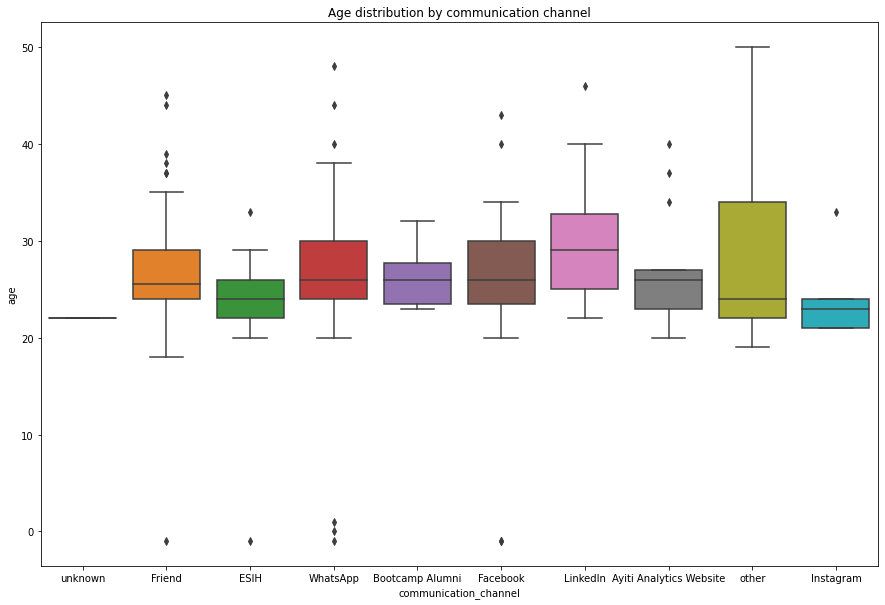

In [51]:
#here your codes
plt.figure(figsize=(15,10))
sns.boxplot(x=result7['communication_channel'],y=result7['age'])
plt.title('Age distribution by communication channel')
plt.show()

### 7 .Is there a significant age difference between these groups

In [52]:
#install missing package
!pip install researchpy
import researchpy as rp
import scipy.stats as stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [53]:
result7['age']=(result7.age.fillna(result7.age.mean()))

In [54]:
#Test
summary, results = rp.ttest(group1= result7['age'][result7['communication_channel'] == 'Ayiti Analytics Website'], group1_name= "Ayiti Analytics Website",
                            group2= result7['age'][result7['communication_channel'] == 'Friend'], group2_name= "Friend",)
"""
                            group3= result7['age'][result7['communication_channel'] == 'Bootcamp Alumni'], group3_name= "Bootcamp Alumni",
                            group4= result7['age'][result7['communication_channel'] == 'ESIH'], group4_name= "ESIH",
                            group5= result7['age'][result7['communication_channel'] == 'Facebook'], group5_name= "Facebook",
                            group6= result7['age'][result7['communication_channel'] == 'Instagram'], group6_name= "Instagram",
                            group7= result7['age'][result7['communication_channel'] == 'LinkedIn'], group7_name= "LinkedIn",
                            group8= result7['age'][result7['communication_channel'] == 'WhatsApp'], group8_name= "WhatsApp",
                            group9= result7['age'][result7['communication_channel'] == 'other'], group9_name= "other",
                            group10= result7['age'][result7['communication_channel'] == 'unknown'], group10_name= "unknown")
"""
print(summary)

                  Variable     N       Mean  ...        SE  95% Conf.   Interval
0  Ayiti Analytics Website  15.0  27.000000  ...  1.473577  23.839492  30.160508
1                   Friend  67.0  26.574260  ...  0.778227  25.020479  28.128041
2                 combined  82.0  26.652139  ...  0.687168  25.284890  28.019388

[3 rows x 7 columns]


In [55]:
print(results)

                                 Independent t-test  results
0  Difference (Ayiti Analytics Website - Friend) =    0.4257
1                             Degrees of freedom =   80.0000
2                                              t =    0.2381
3                          Two side test p value =    0.8124
4                         Difference < 0 p value =    0.5938
5                         Difference > 0 p value =    0.4062
6                                      Cohen's d =    0.0680
7                                      Hedge's g =    0.0674
8                                  Glass's delta =    0.0746
9                                    Pearson's r =    0.0266


In [56]:
#Independent T-Test
stats.ttest_ind(result7['age'][result7['communication_channel'] == 'Ayiti Analytics Website'],
                            result7['age'][result7['communication_channel'] == 'Friend'])


Ttest_indResult(statistic=0.23812617012268827, pvalue=0.8123921001073953)

In [57]:
print("There is any statistically significant difference in the average age between Ayiti_Analytics_Website  and Friend")

There is any statistically significant difference in the average age between Ayiti_Analytics_Website  and Friend


In [58]:
#Independant test between Friend and Alumni
summary, results = rp.ttest(group1= result7['age'][result7['communication_channel'] == 'Friend'], group1_name= "Friend",
                            group2= result7['age'][result7['communication_channel'] == 'Bootcamp Alumni'], group2_name= "Bootcamp Alumni")
print(summary)
print(results)
print("There is any statistically significant difference in the average age between Bootcamp Alumni  and Friend")

          Variable     N       Mean        SD        SE  95% Conf.   Interval
0           Friend  67.0  26.574260  6.370066  0.778227  25.020479  28.128041
1  Bootcamp Alumni  14.0  26.285714  2.920184  0.780452  24.599650  27.971778
2         combined  81.0  26.524388  5.905456  0.656162  25.218584  27.830191
                         Independent t-test  results
0  Difference (Friend - Bootcamp Alumni) =    0.2885
1                     Degrees of freedom =   79.0000
2                                      t =    0.1653
3                  Two side test p value =    0.8692
4                 Difference < 0 p value =    0.5654
5                 Difference > 0 p value =    0.4346
6                              Cohen's d =    0.0486
7                              Hedge's g =    0.0481
8                          Glass's delta =    0.0453
9                            Pearson's r =    0.0186
There is any statistically significant difference in the average age between Bootcamp Alumni  and Friend


In [59]:
#Independant test between Alumni and ESIH
summary, results = rp.ttest(group1= result7['age'][result7['communication_channel'] == 'ESIH'], group1_name= "ESIH",
                            group2= result7['age'][result7['communication_channel'] == 'Bootcamp Alumni'], group2_name= "Bootcamp Alumni")
print(summary)
print(results)
print("There is any statistically significant difference in the average age between Bootcamp Alumni  and ESIH")

          Variable     N       Mean        SD        SE  95% Conf.   Interval
0             ESIH  18.0  23.526412  6.941311  1.636083  20.074579  26.978244
1  Bootcamp Alumni  14.0  26.285714  2.920184  0.780452  24.599650  27.971778
2         combined  32.0  24.733607  5.650880  0.998944  22.696247  26.770966
                       Independent t-test  results
0  Difference (ESIH - Bootcamp Alumni) =   -2.7593
1                   Degrees of freedom =   30.0000
2                                    t =   -1.3908
3                Two side test p value =    0.1745
4               Difference < 0 p value =    0.0873
5               Difference > 0 p value =    0.9127
6                            Cohen's d =   -0.4956
7                            Hedge's g =   -0.4831
8                        Glass's delta =   -0.3975
9                          Pearson's r =    0.2461
There is any statistically significant difference in the average age between Bootcamp Alumni  and ESIH


In [60]:
#Independant test between ESIH and Facebook
summary, results = rp.ttest(group1= result7['age'][result7['communication_channel'] == 'ESIH'], group1_name= "ESIH",
                            group2= result7['age'][result7['communication_channel'] == 'Facebook'], group2_name= "Facebook")
print(summary)
print(results)
print("There is any statistically significant difference in the average age between Facebook  and ESIH")

   Variable     N       Mean        SD        SE  95% Conf.   Interval
0      ESIH  18.0  23.526412  6.941311  1.636083  20.074579  26.978244
1  Facebook  40.0  26.036885  7.998672  1.264701  23.478786  28.594985
2  combined  58.0  25.257773  7.714761  1.012998  23.229280  27.286266
                Independent t-test  results
0  Difference (ESIH - Facebook) =   -2.5105
1            Degrees of freedom =   56.0000
2                             t =   -1.1498
3         Two side test p value =    0.2551
4        Difference < 0 p value =    0.1276
5        Difference > 0 p value =    0.8724
6                     Cohen's d =   -0.3263
7                     Hedge's g =   -0.3219
8                 Glass's delta =   -0.3617
9                   Pearson's r =    0.1519
There is any statistically significant difference in the average age between Facebook  and ESIH


In [61]:
#Independant test between Facebook and Instagram
summary, results = rp.ttest(group1= result7['age'][result7['communication_channel'] == 'Instagram'], group1_name= "Instagram",
                            group2= result7['age'][result7['communication_channel'] == 'Facebook'], group2_name= "Facebook")
print(summary)
print(results)
print("There is any statistically significant difference in the average age between Facebook  and Instagram")

    Variable     N       Mean        SD        SE  95% Conf.   Interval
0  Instagram   5.0  24.400000  4.979960  2.227106  18.216563  30.583437
1   Facebook  40.0  26.036885  7.998672  1.264701  23.478786  28.594985
2   combined  45.0  25.855009  7.696339  1.147303  23.542773  28.167245
                     Independent t-test  results
0  Difference (Instagram - Facebook) =   -1.6369
1                 Degrees of freedom =   43.0000
2                                  t =   -0.4443
3              Two side test p value =    0.6591
4             Difference < 0 p value =    0.3295
5             Difference > 0 p value =    0.6705
6                          Cohen's d =   -0.2107
7                          Hedge's g =   -0.2070
8                      Glass's delta =   -0.3287
9                        Pearson's r =    0.0676
There is any statistically significant difference in the average age between Facebook  and Instagram


In [62]:
#Independant test between Instagram and LinkedIn
summary, results = rp.ttest(group1= result7['age'][result7['communication_channel'] == 'Instagram'], group1_name= "Instagram",
                            group2= result7['age'][result7['communication_channel'] == 'LinkedIn'], group2_name= "LinkedIn")
print(summary)
print(results)
print("There is any statistically significant difference in the average age between LinkedIn and Instagram")

    Variable     N       Mean        SD        SE  95% Conf.   Interval
0  Instagram   5.0  24.400000  4.979960  2.227106  18.216563  30.583437
1   LinkedIn  15.0  29.965027  6.831672  1.763930  26.181773  33.748281
2   combined  20.0  28.573770  6.761891  1.512005  25.409108  31.738433
                     Independent t-test  results
0  Difference (Instagram - LinkedIn) =   -5.5650
1                 Degrees of freedom =   18.0000
2                                  t =   -1.6666
3              Two side test p value =    0.1129
4             Difference < 0 p value =    0.0564
5             Difference > 0 p value =    0.9436
6                          Cohen's d =   -0.8606
7                          Hedge's g =   -0.8243
8                      Glass's delta =   -1.1175
9                        Pearson's r =    0.3656
There is any statistically significant difference in the average age between LinkedIn and Instagram


In [63]:
#Independant test between LinkedIn and WhatsApp
summary, results = rp.ttest(group1= result7['age'][result7['communication_channel'] == 'WhatsApp'], group1_name= "WhatsApp",
                            group2= result7['age'][result7['communication_channel'] == 'LinkedIn'], group2_name= "LinkedIn")
print(summary)
print(results)
print("There is any statistically significant difference in the average age between LinkedIn and WhatsApp")

   Variable     N       Mean        SD        SE  95% Conf.   Interval
0  WhatsApp  66.0  26.529558  7.949788  0.978551  24.575256  28.483860
1  LinkedIn  15.0  29.965027  6.831672  1.763930  26.181773  33.748281
2  combined  81.0  27.165756  7.830709  0.870079  25.434244  28.897268
                    Independent t-test  results
0  Difference (WhatsApp - LinkedIn) =   -3.4355
1                Degrees of freedom =   79.0000
2                                 t =   -1.5471
3             Two side test p value =    0.1258
4            Difference < 0 p value =    0.0629
5            Difference > 0 p value =    0.9371
6                         Cohen's d =   -0.4425
7                         Hedge's g =   -0.4383
8                     Glass's delta =   -0.4321
9                       Pearson's r =    0.1715
There is any statistically significant difference in the average age between LinkedIn and WhatsApp


In [64]:
#Independant test between WhatsApp and other
summary, results = rp.ttest(group1= result7['age'][result7['communication_channel'] == 'WhatsApp'], group1_name= "WhatsApp",
                            group2= result7['age'][result7['communication_channel'] == 'other'], group2_name= "other")
print(summary)
print(results)
print("There is any statistically significant difference in the average age between other and WhatsApp")

   Variable     N       Mean         SD        SE  95% Conf.   Interval
0  WhatsApp  66.0  26.529558   7.949788  0.978551  24.575256  28.483860
1     other   9.0  28.444444  10.211649  3.403883  20.595076  36.293813
2  combined  75.0  26.759344   8.196247  0.946421  24.873559  28.645129
                 Independent t-test  results
0  Difference (WhatsApp - other) =   -1.9149
1             Degrees of freedom =   73.0000
2                              t =   -0.6550
3          Two side test p value =    0.5146
4         Difference < 0 p value =    0.2573
5         Difference > 0 p value =    0.7427
6                      Cohen's d =   -0.2327
7                      Hedge's g =   -0.2303
8                  Glass's delta =   -0.2409
9                    Pearson's r =    0.0764
There is any statistically significant difference in the average age between other and WhatsApp


In [65]:
#Independant test between other and unknown
summary, results = rp.ttest(group1= result7['age'][result7['communication_channel'] == 'unknown'], group1_name= "unknown",
                            group2= result7['age'][result7['communication_channel'] == 'other'], group2_name= "other")
print(summary)
print(results)
print("There is any statistically significant difference in the average age between other and unknown")

   Variable     N       Mean         SD        SE  95% Conf.   Interval
0   unknown   1.0  22.000000        NaN       NaN        NaN        NaN
1     other   9.0  28.444444  10.211649  3.403883  20.595076  36.293813
2  combined  10.0  27.800000   9.840957  3.111984  20.760203  34.839797
                Independent t-test  results
0  Difference (unknown - other) =   -6.4444
1            Degrees of freedom =    8.0000
2                             t =       NaN
3         Two side test p value =       NaN
4        Difference < 0 p value =       NaN
5        Difference > 0 p value =       NaN
6                     Cohen's d =       NaN
7                     Hedge's g =       NaN
8                 Glass's delta =       NaN
9                   Pearson's r =       NaN
There is any statistically significant difference in the average age between other and unknown


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


### 8.Plan a BA strategy for each communication channel regarding the age group

In [66]:
result21=result7.groupby(by=["communication_channel"]).age.mean().to_frame()
result21

,age
communication_channel,
Ayiti Analytics Website,27.000000
Bootcamp Alumni,26.285714
ESIH,23.526412
Facebook,26.036885
Friend,26.574260
Instagram,24.400000
LinkedIn,29.965027
WhatsApp,26.529558
other,28.444444


In [69]:
#import missing package
from matplotlib.colors import ListedColormap

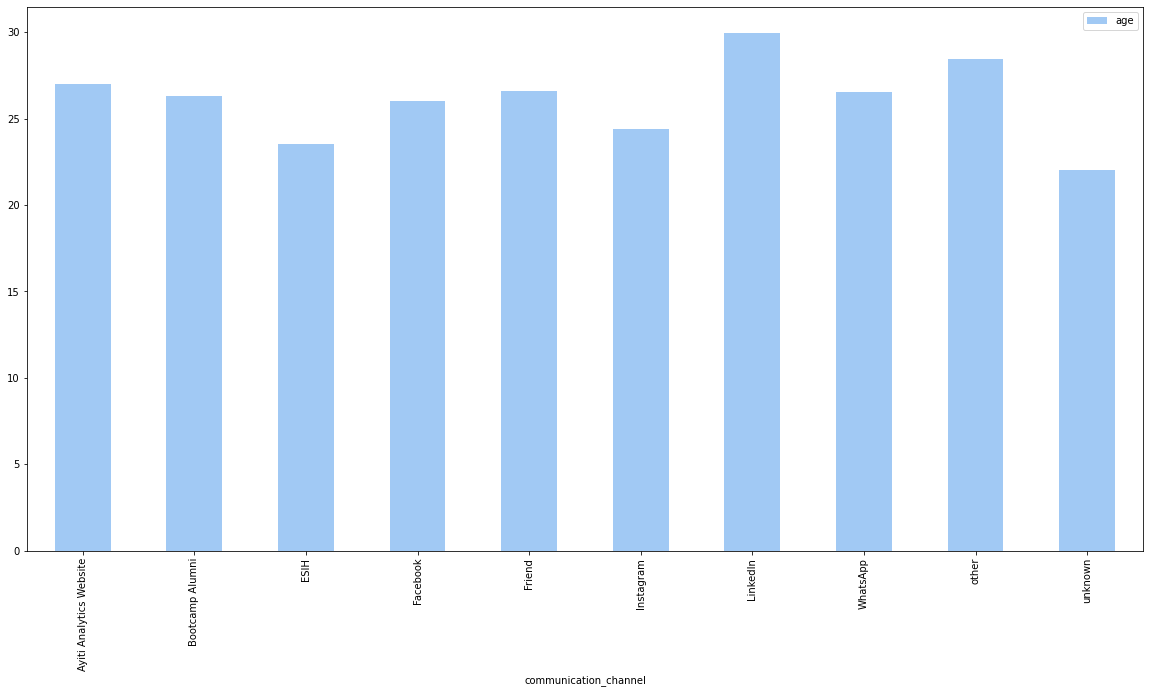

In [70]:
#Graph
# Show communication channel by age avg
fig20 =result21.plot(kind='bar', stacked=False,
          colormap=ListedColormap(sns.color_palette("pastel", 10)), 
          figsize=(20,10))

As we can see we have no significant difference between age group. So we can plan a general message who is susceptible to be positively interpreted by young adult.(between 20 and 30 years old).

### 9.According to the observations what is the probability of being in each channel of communication knowing your are a woman

In [71]:
#here your codes
def proba_c1_knowing_c2(data=result7,c1="communication_channel", c2="gender", c2_mod="", normalize='index'):
  tab_prob=pd.crosstab(result7[c2],result7[c1],normalize="index")
  print(f"Probability of {c1} knowing {c2} ={c2_mod}: ")
  if c2_mod in tab_prob.index:
    for col in tab_prob.columns:
      print(f"The probability of {col} as {c1} knowing {c2_mod} is: {round(tab_prob.at[c2_mod, col],4)}")
  else:
    for col in tab_prob.index:
      print(f"The probability of {c1} as {c2_mod} knowing {col} is: {round(tab_prob.at[col,c2_mod],4)}")


In [72]:
#According to the observations what is the probability of being in each channel of communication knowing your are a woman
proba_c1_knowing_c2(c2_mod="female")

Probability of communication_channel knowing gender =female: 
The probability of Ayiti Analytics Website as communication_channel knowing female is: 0.0851
The probability of Bootcamp Alumni as communication_channel knowing female is: 0.1702
The probability of ESIH as communication_channel knowing female is: 0.1064
The probability of Facebook as communication_channel knowing female is: 0.1277
The probability of Friend as communication_channel knowing female is: 0.234
The probability of Instagram as communication_channel knowing female is: 0.0213
The probability of LinkedIn as communication_channel knowing female is: 0.0213
The probability of WhatsApp as communication_channel knowing female is: 0.1915
The probability of other as communication_channel knowing female is: 0.0426
The probability of unknown as communication_channel knowing female is: 0.0


### 10.According to the observations what is the probability of being in each channel of communication knowing your are a man

In [73]:
#here your codes
#According to the observations what is the probability of being in each channel of communication knowing your are a man
proba_c1_knowing_c2(c2_mod="male")

Probability of communication_channel knowing gender =male: 
The probability of Ayiti Analytics Website as communication_channel knowing male is: 0.0542
The probability of Bootcamp Alumni as communication_channel knowing male is: 0.0296
The probability of ESIH as communication_channel knowing male is: 0.064
The probability of Facebook as communication_channel knowing male is: 0.1675
The probability of Friend as communication_channel knowing male is: 0.2759
The probability of Instagram as communication_channel knowing male is: 0.0197
The probability of LinkedIn as communication_channel knowing male is: 0.069
The probability of WhatsApp as communication_channel knowing male is: 0.2808
The probability of other as communication_channel knowing male is: 0.0345
The probability of unknown as communication_channel knowing male is: 0.0049


### 11. Deduce the probability of being a woman knowing each communication channel

In [74]:
#here your codes
proba_c1_knowing_c2(data=result7,c1="gender", c2="communication_channel", c2_mod="female", normalize='index')

Probability of gender knowing communication_channel =female: 
The probability of gender as female knowing Ayiti Analytics Website is: 0.2667
The probability of gender as female knowing Bootcamp Alumni is: 0.5714
The probability of gender as female knowing ESIH is: 0.2778
The probability of gender as female knowing Facebook is: 0.15
The probability of gender as female knowing Friend is: 0.1642
The probability of gender as female knowing Instagram is: 0.2
The probability of gender as female knowing LinkedIn is: 0.0667
The probability of gender as female knowing WhatsApp is: 0.1364
The probability of gender as female knowing other is: 0.2222
The probability of gender as female knowing unknown is: 0.0


### 13. Deduce the probability of being a woman knowing each communication channel

In [75]:
# here your codes
proba_c1_knowing_c2(data=result7,c1="gender", c2="communication_channel", c2_mod="female", normalize='index')

Probability of gender knowing communication_channel =female: 
The probability of gender as female knowing Ayiti Analytics Website is: 0.2667
The probability of gender as female knowing Bootcamp Alumni is: 0.5714
The probability of gender as female knowing ESIH is: 0.2778
The probability of gender as female knowing Facebook is: 0.15
The probability of gender as female knowing Friend is: 0.1642
The probability of gender as female knowing Instagram is: 0.2
The probability of gender as female knowing LinkedIn is: 0.0667
The probability of gender as female knowing WhatsApp is: 0.1364
The probability of gender as female knowing other is: 0.2222
The probability of gender as female knowing unknown is: 0.0


### 14. Deduce the probability of being a man knowing each communication channel

In [76]:
#here your codes
proba_c1_knowing_c2(data=result7,c1="gender", c2="communication_channel", c2_mod="male", normalize='index')

Probability of gender knowing communication_channel =male: 
The probability of gender as male knowing Ayiti Analytics Website is: 0.7333
The probability of gender as male knowing Bootcamp Alumni is: 0.4286
The probability of gender as male knowing ESIH is: 0.7222
The probability of gender as male knowing Facebook is: 0.85
The probability of gender as male knowing Friend is: 0.8358
The probability of gender as male knowing Instagram is: 0.8
The probability of gender as male knowing LinkedIn is: 0.9333
The probability of gender as male knowing WhatsApp is: 0.8636
The probability of gender as male knowing other is: 0.7778
The probability of gender as male knowing unknown is: 1.0


### 15 Display a plot to see Gender vs Communication Channels .Is there any dependency between communication channels and gender?

In [77]:
#add a columns to result7 
result7["index"]=result7.index

In [78]:
# Summarise dataframe using pivot table: gender & communication channel
data_gender_vs_comm1=pd.pivot_table(result7,values="index", index=['gender',],
 columns=['communication_channel'], aggfunc="count",fill_value =0)

data_gender_vs_comm1

communication_channel,Ayiti Analytics Website,Bootcamp Alumni,ESIH,Facebook,Friend,Instagram,LinkedIn,WhatsApp,other,unknown
gender,,,,,,,,,,
female,4,8,5,6,11,1,1,9,2,0
male,11,6,13,34,56,4,14,57,7,1


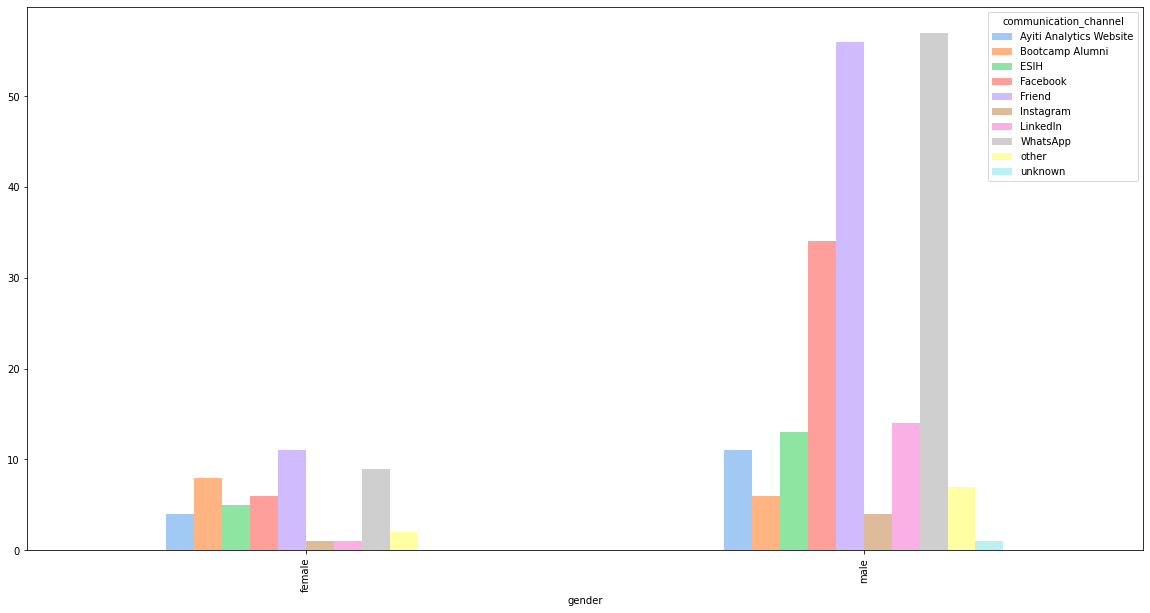

In [83]:
#Graph
fig1 =data_gender_vs_comm1.plot(kind='bar', stacked=False,
          colormap=ListedColormap(sns.color_palette("pastel", 10)), 
          figsize=(20,10))


Null Hypothesis H0: The two categorical variables are independent—that is, communication channel is independent with gender.

Alternative Hypothesis Ha : The two categorical variables are not independent—that is, communication channel is not independent with gender.

In [84]:
# Apply Test
stat, p, dof, expected = chi2_contingency(data_gender_vs_comm1.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected", "That is mean we have a dependency between gender and communication channel")
else:
 print("Hypothesis Accepted", "That is mean we do not have any dependency between gender and communication channel")

p-values: 0.02907484414773651
Hypothesis Rejected That is mean we have a dependency between gender and communication channel


### 16 Use the same method to display plot and know if is there any dependency between communication channels and Bootcamp Interest?

In [85]:
# Summarise dataframe using pivot table: communication channel &  Bootcamp Interest
data_Boot_vs_comm=pd.pivot_table(result7,values="index", index=['Bootcamp_Interest',],
 columns=['communication_channel'], aggfunc="count",fill_value =0)

data_Boot_vs_comm

communication_channel,Ayiti Analytics Website,Bootcamp Alumni,ESIH,Facebook,Friend,Instagram,LinkedIn,WhatsApp,other,unknown
Bootcamp_Interest,,,,,,,,,,
Finding a job/internship,1,3,2,10,10,2,2,11,2,0
Improving my data analysis skills,9,8,12,20,38,0,10,29,4,0
Mentorship,1,0,1,3,1,0,0,6,1,0
Switching careers,2,1,0,3,4,1,1,8,0,0
Training to start my own company,2,1,2,4,14,2,2,11,1,0
other,0,0,1,0,0,0,0,1,1,0
unknown,0,1,0,0,0,0,0,0,0,1


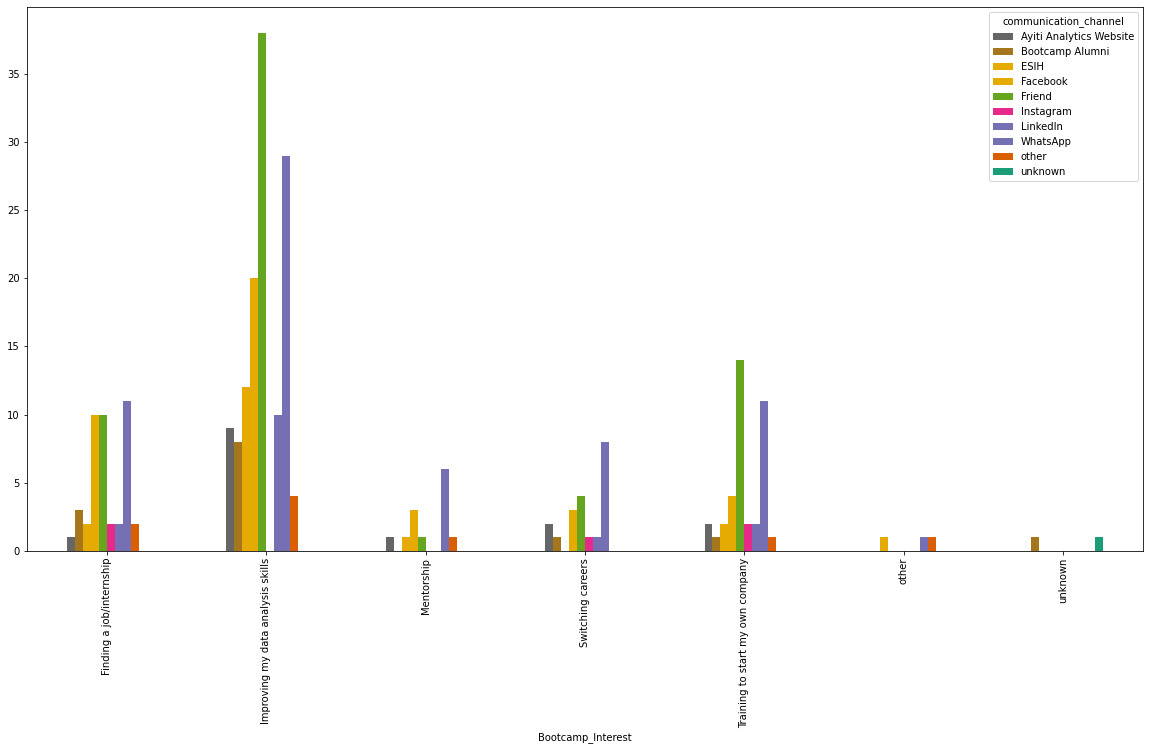

In [86]:
#Graph
fig1 =data_Boot_vs_comm.plot(kind='bar', stacked=False,
          colormap=ListedColormap(sns.color_palette("Dark2_r", 10)), 
          figsize=(20,10))


Null Hypothesis H0: The two categorical variables are independent—that is, communication channel is independent to Bootcamp_Interest.

Alternative Hypothesis Ha : The two categorical variables are not independent—that is, communication channel is not independent to Bootcamp_Interest.

In [87]:
# Apply Test
stat, p, dof, expected = chi2_contingency(data_Boot_vs_comm.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected", "That is mean we have a dependency between bootcamp interest and communication channel")
else:
 print("Hypothesis Accepted", "That is mean we do not have any dependency between bootacmp interest and communication channel")

p-values: 2.7040922010696464e-14
Hypothesis Rejected That is mean we have a dependency between bootcamp interest and communication channel


### 17.Plan a BA  strategy for each communication channel, Bootcamp Interest regarding the gender 

In [88]:
#here your codes
#Filt communication channel by quest_id and gender
result16=pd.pivot_table(data=result7,values="quest_id",index="communication_channel",columns="gender",aggfunc="count")
print(result16)

#Filt Bootcamp Interest by quest_id and gender
result17=pd.pivot_table(data=result7,values="quest_id",index="Bootcamp_Interest",columns="gender",aggfunc="count")
print(result17)

#merge the previous dataframe
#result18=pd.concat([result17,result16],axis=1)
#print(result18)

gender                   female  male
communication_channel                
Ayiti Analytics Website     4.0  11.0
Bootcamp Alumni             8.0   6.0
ESIH                        5.0  13.0
Facebook                    6.0  34.0
Friend                     11.0  56.0
Instagram                   1.0   4.0
LinkedIn                    1.0  14.0
WhatsApp                    9.0  57.0
other                       2.0   7.0
unknown                     NaN   1.0
gender                             female   male
Bootcamp_Interest                               
Finding a job/internship             10.0   33.0
Improving my data analysis skills    24.0  106.0
Mentorship                            4.0    9.0
Switching careers                     3.0   17.0
Training to start my own company      6.0   33.0
other                                 NaN    3.0
unknown                               NaN    2.0


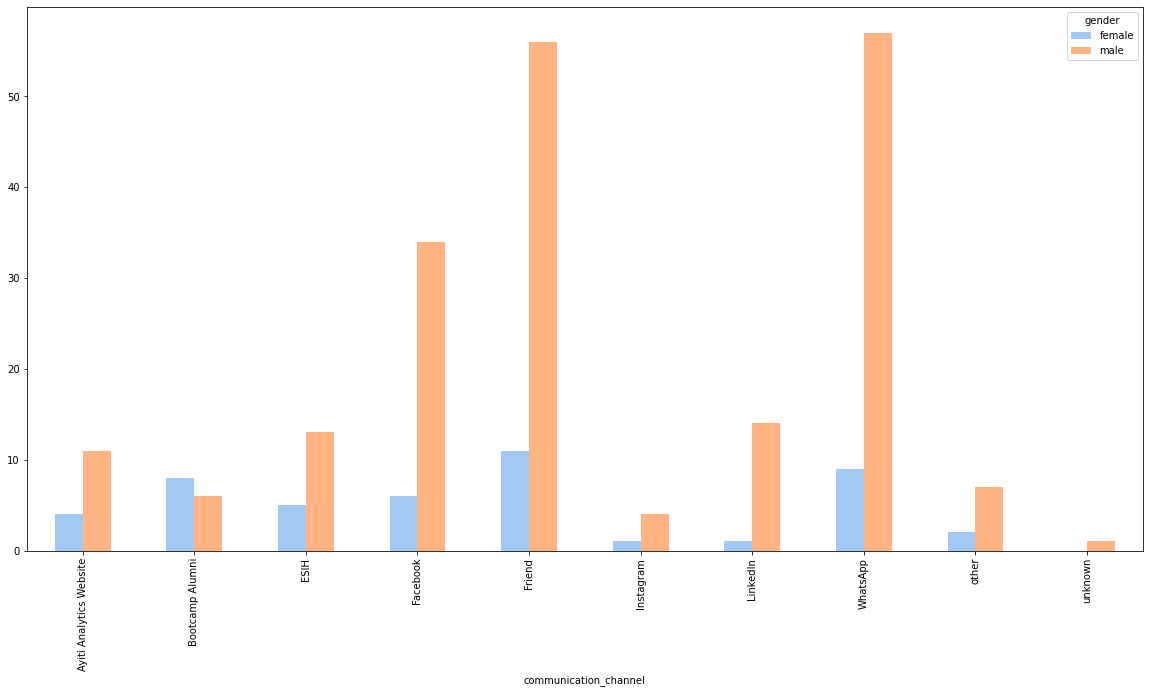

In [89]:
#Graph
# Show communication channel by gender
fig18 =result16.plot(kind='bar', stacked=False,
          colormap=ListedColormap(sns.color_palette("pastel", 2)), 
          figsize=(20,10))

As we can see on the previous graph:

-if the gender is male,the communication channel who must be used is whatssap following by friend.The message must be able to deliver in less than 40seconds.

-if the gender is female, the communication channel who must be used is friend following by bootcamp Alumni. For them Ayiti Analytics must prepare a message easily transmissible by voice.

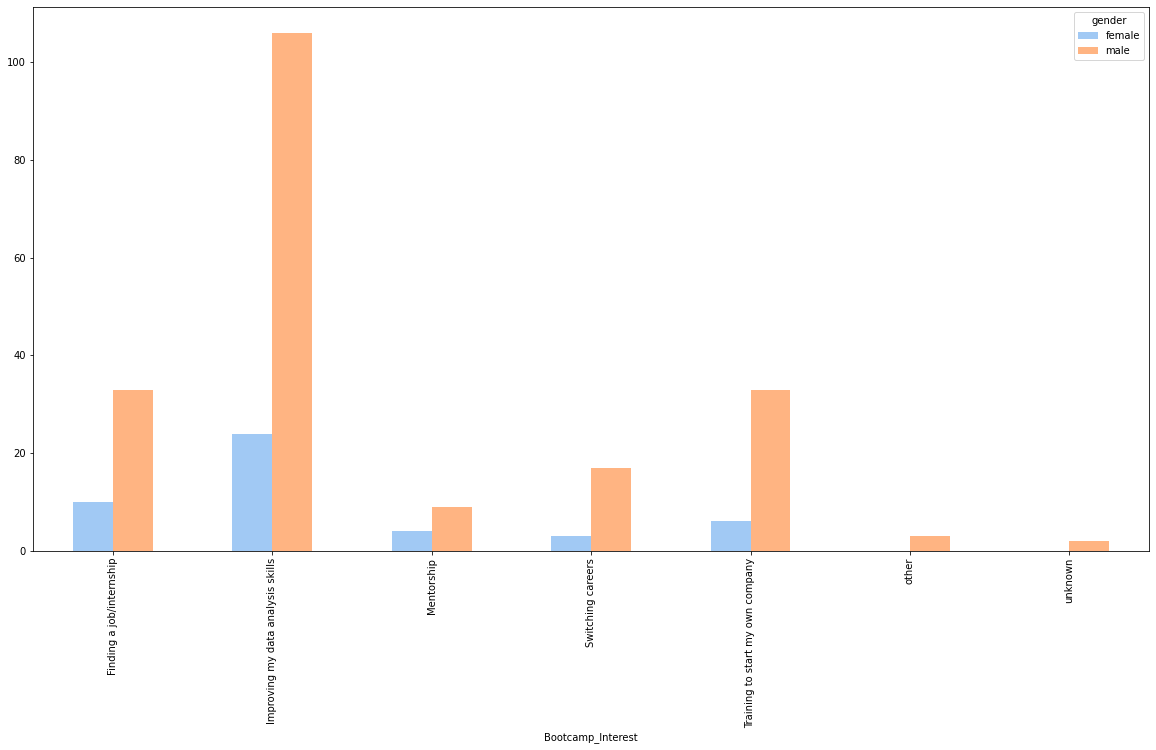

In [90]:
#Graph
#Show Bootcamp interest by gender
fig19 =result17.plot(kind='bar', stacked=False,
          colormap=ListedColormap(sns.color_palette("pastel", 2)), 
          figsize=(20,10))

As we can see on the previous graph:

-if the gender is male and the objectives is to increase the numbers of participants . The message must be focus on those three group:"data analysis Skills, Finding Job, start own company"

-if the gender is female and the objectives is to increase the numbers of participants . The message must be focus on those three group:"data analysis Skills, Finding Job, start our own company".

### 18.Plan a BA  strategy for each communication channel, Bootcamp Interest regarding the gender

In [91]:
# here your codes
#is same as previous question
#17.Plan a BA strategy for each communication channel, Bootcamp Interest regarding the gender

### 19. Calculate 
    * P(Bootcamp Interest,Communication channels,Gender/Payed=yes)
    * P(Bootcamp Interest,Communication channels,Gender/Payed=no)

In [141]:
#Determine shape 
Yes=len(result7[result7["payed"]=="Yes"])
No=len(result7)-Yes

In [143]:
#here your code
result9=pd.pivot_table(result7[result7['payed']=="Yes"], values="quest_id", index=['Bootcamp_Interest', 'communication_channel','gender'], aggfunc="count")
result9=result9/Yes
print("Probabilities for a payed applicant by Bootcamp interest , communication channel and gender category")
print(result9)

#here your code
result10=pd.pivot_table(result7[result7['payed']=="No"], values="quest_id", index=['Bootcamp_Interest', 'communication_channel','gender'], aggfunc="count")
result10=result10/No
print("Probabilities for a non-payed applicant by Bootcamp interest , communication channel and gender category")
print(result10)

Probabilities for a payed applicant by Bootcamp interest , communication channel and gender category
                                                                  quest_id
Bootcamp_Interest                 communication_channel   gender          
Finding a job/internship          Ayiti Analytics Website male    0.015385
                                  Bootcamp Alumni         female  0.015385
                                  ESIH                    male    0.015385
                                  Facebook                male    0.015385
                                  Friend                  female  0.015385
                                                          male    0.030769
                                  Instagram               male    0.015385
                                  LinkedIn                male    0.015385
                                  WhatsApp                female  0.015385
                                                          male    0.046154

### 20 Deduce 
* P(Payed="yes"/Bootcamp Interest="Increase Skill",Communication channels="Friend",Gender="male")
* P(Payed="no"/Bootcamp Interest="Increase Skill",Communication channels="Friend",Gender="male")

In [136]:
result8=result7[(result7["Bootcamp_Interest"]=="Improving my data analysis skills") &(result7['communication_channel']=="Friend") & (result7['gender']=='male')]
result8=result8['payed'].value_counts(normalize=True)
result8.rename(index={"Yes": "Probability than the applicant payes knowing he wants to improve her skills, he is a male and he is invited by a friend","No": "Probability than the applicant doesn't pay knowing he wants to improve her skills, he is a male and he is invited by a friend"}, inplace=True)
result8

Probability than the applicant doesn't pay knowing he wants to improve her skills, he is a male and he is invited by a friend    0.5625
Probability than the applicant payes knowing he wants to improve her skills, he is a male and he is invited by a friend          0.4375
Name: payed, dtype: float64

### Based on these findings, propose strategies to increase our sales?

In [ ]:
#here your codes